In [1]:
import pandas as pd
import numpy as np

In [2]:
#in results.pkl ci sono le labels e le probabilità di ogni classe calcolate dal modello per ciascuna riga
results=pd.read_pickle('cv_notino.pkl')

In [3]:
results.isnull().sum().sum()

0

In [4]:
#Funzioni di supporto
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
def print_scores(test_labels, test_probs, ):
    print('\nClassification Report\n')
    classes = ["Ortorombic","Tetragonal","Monoclinic","Trigonal","Hexagonal","Triclinic","Cubic"]
    print(classification_report(labels, preds, target_names=classes))
    accuracy = accuracy_score(labels, preds)
    print('\nAccuracy: {:.2f}\n'.format(accuracy))

    print('Micro Precision: {:.2f}'.format(precision_score(labels, preds, average='micro')))
    print('Micro Recall: {:.2f}'.format(recall_score(labels, preds, average='micro')))
    print('Micro F1-score: {:.2f}\n'.format(f1_score(labels, preds, average='micro')))

    print('Macro Precision: {:.2f}'.format(precision_score(labels, preds, average='macro')))
    print('Macro Recall: {:.2f}'.format(recall_score(labels, preds, average='macro')))
    print('Macro F1-score: {:.2f}\n'.format(f1_score(labels, preds, average='macro')))

    print('Weighted Precision: {:.2f}'.format(precision_score(labels, preds, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(labels, preds, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(labels, preds, average='weighted')))
    cm=confusion_matrix(labels, preds)
    plot_confusion_matrix(cm,target_names=classes, normalize=True,)
    return accuracy

In [5]:
labels = results['class'].values
labels=labels.astype(int)
probabilities=results[[0,1,2,3,4,5,6]]

In [6]:
probabilities

,0,1,2,3,4,5,6
0,0.435564,0.021107,0.443443,6.614153e-02,2.043043e-03,0.031696,5.107998e-06
1,0.000653,0.000073,0.052139,2.057003e-05,7.857022e-06,0.947106,6.266934e-07
2,0.005412,0.000034,0.501533,6.473371e-05,7.162420e-06,0.492949,2.976184e-07
3,0.016924,0.000311,0.349938,1.984428e-04,7.585346e-05,0.632551,1.377717e-06
4,0.000001,0.000001,0.001547,7.539325e-07,2.446701e-07,0.998450,2.079588e-07
...,...,...,...,...,...,...,...
319436,0.345745,0.000283,0.637329,1.550929e-04,4.282431e-05,0.016445,3.773959e-07
319437,0.096043,0.000170,0.677545,2.002384e-04,6.232935e-05,0.225977,2.538321e-06
319438,0.002143,0.000054,0.074394,6.935275e-05,2.227310e-05,0.923300,1.765407e-05
319439,0.636621,0.000513,0.342100,1.661892e-04,7.806114e-05,0.020521,8.536193e-07


In [7]:
preds = probabilities.apply(np.argmax, axis=1).values

In [8]:
print('\nClassification Report\n')
classes=["Ortorombic","Tetragonal","Monoclinic","Trigonal","Hexagonal","Triclinic","Cubic"]
print(classification_report(labels, preds, target_names=classes))


Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.36      0.64      0.46     50929
  Tetragonal       0.33      0.52      0.40      7090
  Monoclinic       0.64      0.51      0.57    165878
    Trigonal       0.37      0.57      0.45      5873
   Hexagonal       0.23      0.34      0.28      1678
   Triclinic       0.59      0.49      0.53     86064
       Cubic       0.86      0.74      0.79      1927

    accuracy                           0.53    319439
   macro avg       0.48      0.54      0.50    319439
weighted avg       0.57      0.53      0.54    319439



In [9]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(labels, preds)))

print('Micro Precision: {:.2f}'.format(precision_score(labels, preds, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(labels, preds, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(labels, preds, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(labels, preds, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(labels, preds, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(labels, preds, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(labels, preds, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(labels, preds, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(labels, preds, average='weighted')))


Accuracy: 0.53

Micro Precision: 0.53
Micro Recall: 0.53
Micro F1-score: 0.53

Macro Precision: 0.48
Macro Recall: 0.54
Macro F1-score: 0.50

Weighted Precision: 0.57
Weighted Recall: 0.53
Weighted F1-score: 0.54


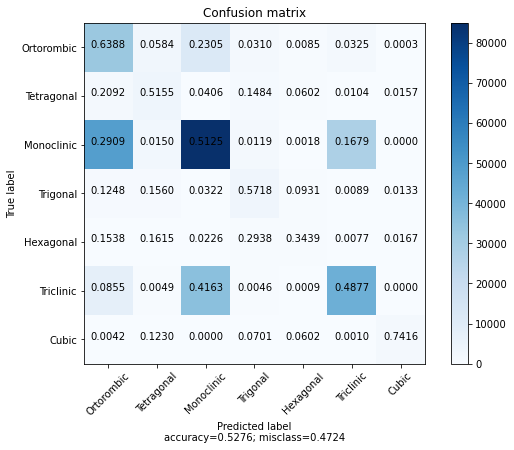

[[32535  2973 11738  1578   432  1657    16]
 [ 1483  3655   288  1052   427    74   111]
 [48253  2490 85016  1980   292 27843     4]
 [  733   916   189  3358   547    52    78]
 [  258   271    38   493   577    13    28]
 [ 7362   421 35831   394    77 41975     4]
 [    8   237     0   135   116     2  1429]]


In [10]:
cm=confusion_matrix(labels, preds)
plot_confusion_matrix(cm,target_names=classes, normalize=True,)
print(cm)

---

## Confidence 

In [12]:
#Proviamo a droppare le righe nelle quali la differenza tra la prima probavilità e la seconda è minore
#di una soglia 
confidence = pd.DataFrame(columns=[['Threshold', 'Accuracy','% dropped']])
results=pd.read_pickle('cv_notino_conf.pkl')
results

,class,0,1,2,3,4,5,6,conf
0,0,0.435564,0.021107,0.443443,6.614153e-02,2.043043e-03,0.031696,5.107998e-06,0.007879
1,2,0.000653,0.000073,0.052139,2.057003e-05,7.857022e-06,0.947106,6.266934e-07,0.894967
2,2,0.005412,0.000034,0.501533,6.473371e-05,7.162420e-06,0.492949,2.976184e-07,0.008583
3,5,0.016924,0.000311,0.349938,1.984428e-04,7.585346e-05,0.632551,1.377717e-06,0.282613
4,5,0.000001,0.000001,0.001547,7.539325e-07,2.446701e-07,0.998450,2.079588e-07,0.996903
...,...,...,...,...,...,...,...,...,...
319436,2,0.345745,0.000283,0.637329,1.550929e-04,4.282431e-05,0.016445,3.773959e-07,0.291584
319437,2,0.096043,0.000170,0.677545,2.002384e-04,6.232935e-05,0.225977,2.538321e-06,0.451568
319438,2,0.002143,0.000054,0.074394,6.935275e-05,2.227310e-05,0.923300,1.765407e-05,0.848906
319439,5,0.636621,0.000513,0.342100,1.661892e-04,7.806114e-05,0.020521,8.536193e-07,0.294521


<AxesSubplot:ylabel='Frequency'>

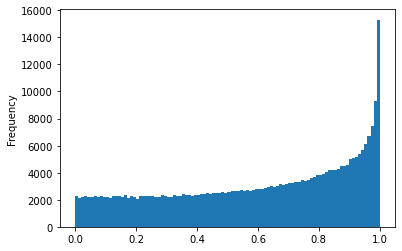

In [13]:
%matplotlib inline
results['conf'].plot.hist(bins=100)

************************************
THRESHOLD 0  INDEXES TO DROP:  0
LEN FILTERED  319439
LEN UNFILTERED  319439
Percentuale casi eliminati 0.0 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.36      0.64      0.46     50929
  Tetragonal       0.33      0.52      0.40      7090
  Monoclinic       0.64      0.51      0.57    165878
    Trigonal       0.37      0.57      0.45      5873
   Hexagonal       0.23      0.34      0.28      1678
   Triclinic       0.59      0.49      0.53     86064
       Cubic       0.86      0.74      0.79      1927

    accuracy                           0.53    319439
   macro avg       0.48      0.54      0.50    319439
weighted avg       0.57      0.53      0.54    319439


Accuracy: 0.53

Micro Precision: 0.53
Micro Recall: 0.53
Micro F1-score: 0.53

Macro Precision: 0.48
Macro Recall: 0.54
Macro F1-score: 0.50

Weighted Precision: 0.57
Weighted Recall: 0.53
Weighted F1-score: 0.54


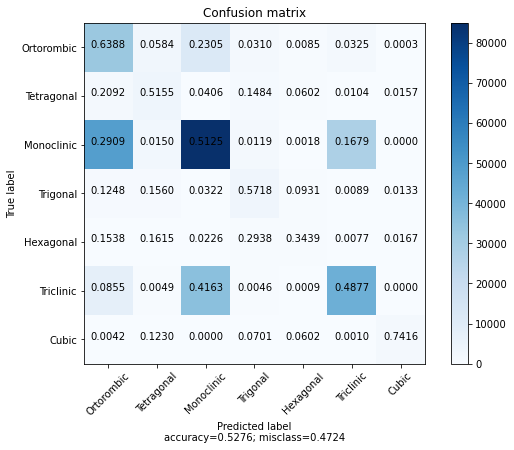

************************************
THRESHOLD 0.1  INDEXES TO DROP:  22317
LEN FILTERED  297122
LEN UNFILTERED  319439
Percentuale casi eliminati 6.99 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.37      0.66      0.47     47584
  Tetragonal       0.35      0.53      0.42      6577
  Monoclinic       0.64      0.52      0.57    153648
    Trigonal       0.40      0.59      0.48      5440
   Hexagonal       0.25      0.35      0.29      1538
   Triclinic       0.60      0.50      0.54     80490
       Cubic       0.86      0.76      0.81      1845

    accuracy                           0.54    297122
   macro avg       0.50      0.56      0.51    297122
weighted avg       0.57      0.54      0.54    297122


Accuracy: 0.54

Micro Precision: 0.54
Micro Recall: 0.54
Micro F1-score: 0.54

Macro Precision: 0.50
Macro Recall: 0.56
Macro F1-score: 0.51

Weighted Precision: 0.57
Weighted Recall: 0.54
Weighted F1-score: 0.54


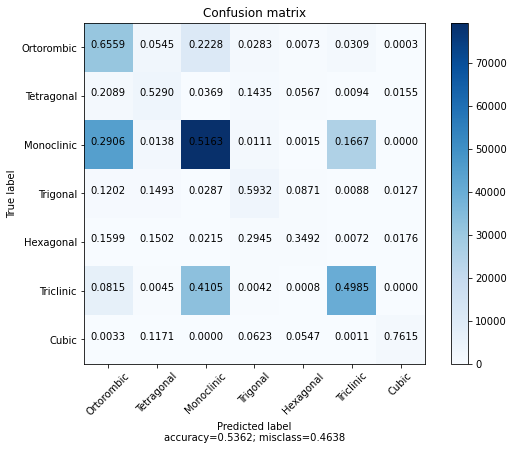

************************************
THRESHOLD 0.2  INDEXES TO DROP:  44648
LEN FILTERED  274791
LEN UNFILTERED  319439
Percentuale casi eliminati 13.98 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.38      0.67      0.48     44366
  Tetragonal       0.37      0.55      0.44      6021
  Monoclinic       0.65      0.52      0.58    141233
    Trigonal       0.42      0.61      0.50      5047
   Hexagonal       0.28      0.36      0.31      1406
   Triclinic       0.61      0.51      0.55     74944
       Cubic       0.87      0.78      0.82      1774

    accuracy                           0.54    274791
   macro avg       0.51      0.57      0.53    274791
weighted avg       0.58      0.54      0.55    274791


Accuracy: 0.54

Micro Precision: 0.54
Micro Recall: 0.54
Micro F1-score: 0.54

Macro Precision: 0.51
Macro Recall: 0.57
Macro F1-score: 0.53

Weighted Precision: 0.58
Weighted Recall: 0.54
Weighted F1-score: 0.55


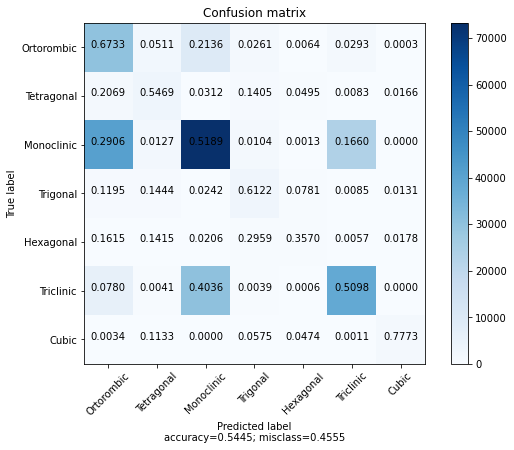

************************************
THRESHOLD 0.3  INDEXES TO DROP:  67082
LEN FILTERED  252357
LEN UNFILTERED  319439
Percentuale casi eliminati 21.0 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.39      0.69      0.50     41165
  Tetragonal       0.40      0.56      0.47      5570
  Monoclinic       0.65      0.52      0.58    128685
    Trigonal       0.44      0.63      0.52      4678
   Hexagonal       0.31      0.36      0.33      1299
   Triclinic       0.62      0.52      0.57     69270
       Cubic       0.87      0.80      0.83      1690

    accuracy                           0.55    252357
   macro avg       0.53      0.58      0.54    252357
weighted avg       0.59      0.55      0.56    252357


Accuracy: 0.55

Micro Precision: 0.55
Micro Recall: 0.55
Micro F1-score: 0.55

Macro Precision: 0.53
Macro Recall: 0.58
Macro F1-score: 0.54

Weighted Precision: 0.59
Weighted Recall: 0.55
Weighted F1-score: 0.56


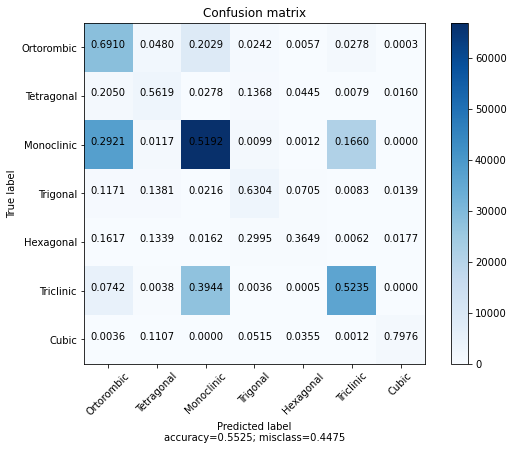

************************************
THRESHOLD 0.4  INDEXES TO DROP:  90263
LEN FILTERED  229176
LEN UNFILTERED  319439
Percentuale casi eliminati 28.26 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.40      0.71      0.51     37791
  Tetragonal       0.42      0.58      0.49      5117
  Monoclinic       0.65      0.52      0.58    115783
    Trigonal       0.46      0.65      0.54      4309
   Hexagonal       0.34      0.38      0.36      1190
   Triclinic       0.63      0.54      0.58     63351
       Cubic       0.88      0.81      0.85      1635

    accuracy                           0.56    229176
   macro avg       0.54      0.60      0.56    229176
weighted avg       0.60      0.56      0.57    229176


Accuracy: 0.56

Micro Precision: 0.56
Micro Recall: 0.56
Micro F1-score: 0.56

Macro Precision: 0.54
Macro Recall: 0.60
Macro F1-score: 0.56

Weighted Precision: 0.60
Weighted Recall: 0.56
Weighted F1-score: 0.57


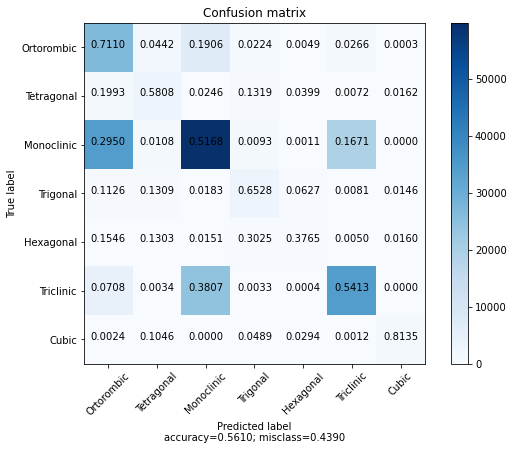

************************************
THRESHOLD 0.5  INDEXES TO DROP:  114977
LEN FILTERED  204462
LEN UNFILTERED  319439
Percentuale casi eliminati 35.99 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.41      0.73      0.53     34362
  Tetragonal       0.45      0.60      0.51      4650
  Monoclinic       0.66      0.51      0.58    101948
    Trigonal       0.49      0.68      0.57      3934
   Hexagonal       0.38      0.39      0.38      1072
   Triclinic       0.64      0.56      0.60     56942
       Cubic       0.89      0.82      0.86      1554

    accuracy                           0.57    204462
   macro avg       0.56      0.61      0.58    204462
weighted avg       0.60      0.57      0.57    204462


Accuracy: 0.57

Micro Precision: 0.57
Micro Recall: 0.57
Micro F1-score: 0.57

Macro Precision: 0.56
Macro Recall: 0.61
Macro F1-score: 0.58

Weighted Precision: 0.60
Weighted Recall: 0.57
Weighted F1-score: 0.57


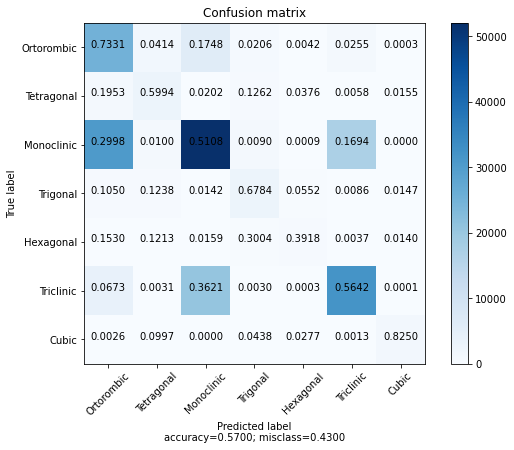

************************************
THRESHOLD 0.6  INDEXES TO DROP:  141853
LEN FILTERED  177586
LEN UNFILTERED  319439
Percentuale casi eliminati 44.41 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.43      0.76      0.55     30502
  Tetragonal       0.48      0.62      0.54      4178
  Monoclinic       0.67      0.50      0.57     86928
    Trigonal       0.52      0.71      0.60      3564
   Hexagonal       0.42      0.40      0.41       958
   Triclinic       0.65      0.60      0.62     49982
       Cubic       0.90      0.84      0.87      1474

    accuracy                           0.58    177586
   macro avg       0.58      0.63      0.59    177586
weighted avg       0.62      0.58      0.58    177586


Accuracy: 0.58

Micro Precision: 0.58
Micro Recall: 0.58
Micro F1-score: 0.58

Macro Precision: 0.58
Macro Recall: 0.63
Macro F1-score: 0.59

Weighted Precision: 0.62
Weighted Recall: 0.58
Weighted F1-score: 0.58


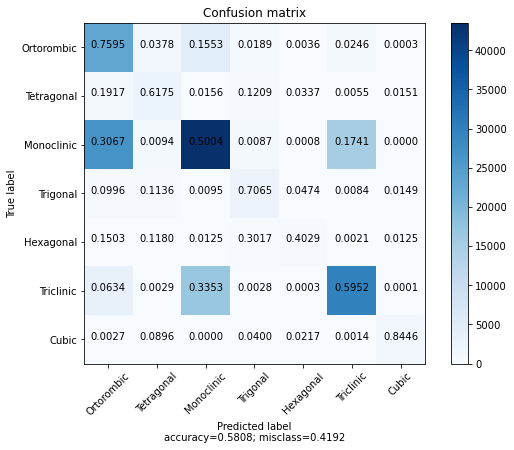

************************************
THRESHOLD 0.7  INDEXES TO DROP:  171608
LEN FILTERED  147831
LEN UNFILTERED  319439
Percentuale casi eliminati 53.72 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.45      0.79      0.57     26324
  Tetragonal       0.52      0.64      0.57      3633
  Monoclinic       0.68      0.48      0.56     70208
    Trigonal       0.55      0.74      0.63      3155
   Hexagonal       0.47      0.43      0.45       845
   Triclinic       0.67      0.64      0.65     42297
       Cubic       0.91      0.86      0.88      1369

    accuracy                           0.59    147831
   macro avg       0.61      0.65      0.62    147831
weighted avg       0.63      0.59      0.59    147831


Accuracy: 0.59

Micro Precision: 0.59
Micro Recall: 0.59
Micro F1-score: 0.59

Macro Precision: 0.61
Macro Recall: 0.65
Macro F1-score: 0.62

Weighted Precision: 0.63
Weighted Recall: 0.59
Weighted F1-score: 0.59


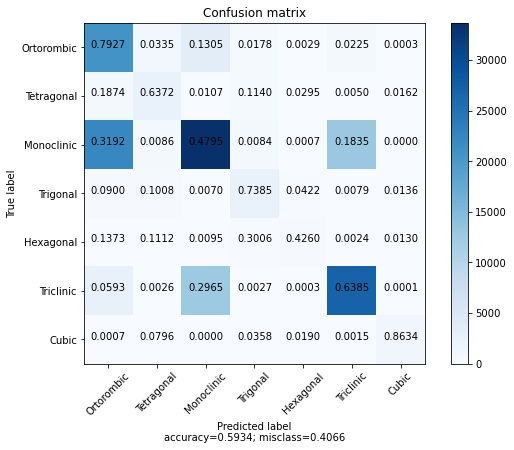

************************************
THRESHOLD 0.8  INDEXES TO DROP:  206045
LEN FILTERED  113394
LEN UNFILTERED  319439
Percentuale casi eliminati 64.5 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.47      0.83      0.60     21294
  Tetragonal       0.58      0.66      0.61      3032
  Monoclinic       0.69      0.44      0.54     50913
    Trigonal       0.59      0.78      0.67      2661
   Hexagonal       0.55      0.45      0.50       712
   Triclinic       0.69      0.70      0.69     33530
       Cubic       0.92      0.88      0.90      1252

    accuracy                           0.61    113394
   macro avg       0.64      0.68      0.64    113394
weighted avg       0.64      0.61      0.60    113394


Accuracy: 0.61

Micro Precision: 0.61
Micro Recall: 0.61
Micro F1-score: 0.61

Macro Precision: 0.64
Macro Recall: 0.68
Macro F1-score: 0.64

Weighted Precision: 0.64
Weighted Recall: 0.61
Weighted F1-score: 0.60


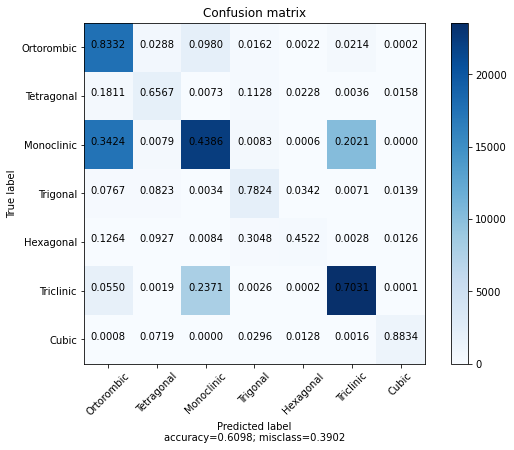

************************************
THRESHOLD 0.9  INDEXES TO DROP:  248274
LEN FILTERED  71165
LEN UNFILTERED  319439
Percentuale casi eliminati 77.72 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.51      0.89      0.65     14673
  Tetragonal       0.65      0.70      0.67      2145
  Monoclinic       0.71      0.33      0.45     27887
    Trigonal       0.66      0.84      0.74      2078
   Hexagonal       0.73      0.53      0.61       544
   Triclinic       0.72      0.82      0.76     22786
       Cubic       0.93      0.92      0.93      1052

    accuracy                           0.64     71165
   macro avg       0.70      0.72      0.69     71165
weighted avg       0.67      0.64      0.62     71165


Accuracy: 0.64

Micro Precision: 0.64
Micro Recall: 0.64
Micro F1-score: 0.64

Macro Precision: 0.70
Macro Recall: 0.72
Macro F1-score: 0.69

Weighted Precision: 0.67
Weighted Recall: 0.64
Weighted F1-score: 0.62


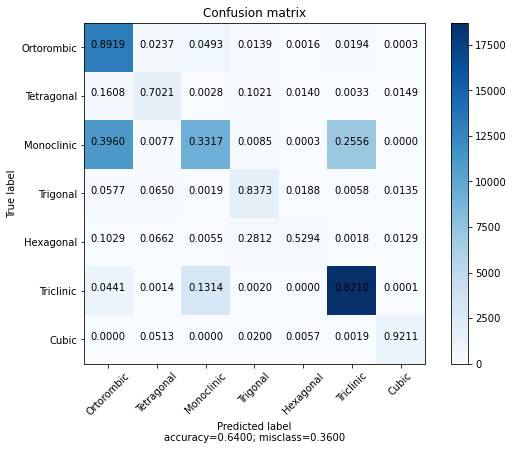

In [14]:
for thr_value in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    threshold=thr_value
    indexes_to_drop=[]
    count=0
    for index, row in results.iterrows():
        conf = row['conf']
        if conf <= threshold:
            indexes_to_drop.append(index)
    print('************************************')
    print('THRESHOLD', threshold, ' INDEXES TO DROP: ', len(indexes_to_drop))
    filtered_results = results[~results.index.isin(indexes_to_drop)].copy()
    print('LEN FILTERED ', len(filtered_results))
    print('LEN UNFILTERED ', len(results))
    percent_dropped = round(len(indexes_to_drop)/len(results)*100, 2)
    print("Percentuale casi eliminati", percent_dropped,"%")
    labels = filtered_results['class'].values
    labels=labels.astype(int)
    probabilities=filtered_results[[0,1,2,3,4,5,6]]
    preds = probabilities.apply(np.argmax, axis=1).values
    accuracy = print_scores(labels, preds)
    thr = len(confidence)
    confidence.loc[thr]=[threshold, accuracy, percent_dropped]

---

In [15]:
confidence

,Threshold,Accuracy,% dropped
0,0.0,0.527628,0.00
1,0.1,0.536170,6.99
2,0.2,0.544479,13.98
3,0.3,0.552463,21.00
4,0.4,0.560966,28.26
5,0.5,0.570013,35.99
6,0.6,0.580772,44.41
7,0.7,0.593441,53.72
8,0.8,0.609821,64.50
9,0.9,0.640048,77.72
